In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_digits

dt_digits= load_digits()

x, y = dt_digits.data, dt_digits.target

In [ ]:
Project: Handwritten Digit Recognition. Goal: Build a model that can identify a handwritten digit (0-9).

Instructions to follow

Your Mission: Your goal is to build the most accurate model you can to recognize handwritten digits.
Load the Data: Instead of load_iris(), you'll use from sklearn.datasets import load_digits.
Explore: What is the shape of this new X data? How many classes are in y?
Prepare the Data: You know the drill!
Build Your Model:
What will your input_shape be?
What activation function and how many units will your final Dense layer have? Add at least one Dropout layer to prevent overfitting.
Compile Your Model:
Choose your optimizer (adam is great).
Choose the correct loss function for a multi-class problem with integer labels.
Train and Visualize:
Train your model using .fit() and save the history.
Plot the loss and accuracy curves! See if you can spot any overfitting.
Experiment!*
Try changing the Dropout rate (e.g., from 0.2 to 0.5). How does that affect your plots?
Try adding another Dense and Dropout layer. Does it help or hurt?
Evaluate: What is the final test accuracy of your best model?

In [ ]:
x.shape

(1797, 64)

In [ ]:
x_test,x_train,y_test,y_train=train_test_split(x,y, test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [ ]:
model=models.Sequential([
    layers.Dense(units=64,activation='relu',input_shape=(x_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(units=32,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=16,activation='relu'),
    layers.Dense(units=10,activation='softmax')
])
model.compile(optimizer='Adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,938 (27.10 KB)

 Trainable params: 6,938 (27.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from re import VERBOSE
History=model.fit(x_train,
                  y_train,
                  epochs=100,
                  validation_data= (x_test,y_test),
                 verbose=1
                  )

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0899 - loss: 2.4377 - val_accuracy: 0.1740 - val_loss: 2.2458
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1427 - loss: 2.2502 - val_accuracy: 0.2971 - val_loss: 2.1504
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2132 - loss: 2.1585 - val_accuracy: 0.3918 - val_loss: 2.0661
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2795 - loss: 2.0637 - val_accuracy: 0.4405 - val_loss: 1.9675
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3114 - loss: 1.9881 - val_accuracy: 0.4774 - val_loss: 1.8532
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3415 - loss: 1.9138 - val_accuracy: 0.5184 - val_loss: 1.7215
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4630 - loss: 1.7048 - val_accuracy: 0.5581 - val_loss: 1.5851
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4653 - loss: 1.6513 - val_accuracy: 0.

In [ ]:
 loss,accuracy=model.evaluate(x_test,y_test)
 print(loss)
 print(accuracy)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9555 - loss: 0.2776
0.2355411946773529
0.9512873888015747


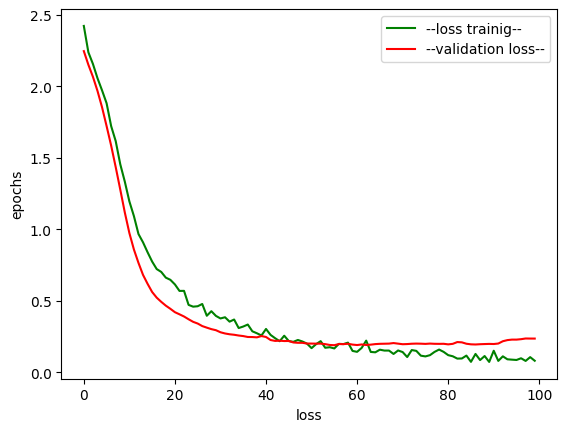

In [ ]:
# plt.figure(figsize=(12,8))
# plt.subplots(2,1)
plt.plot(History.history['loss'],color='green',label='--loss trainig--')
plt.plot(History.history['val_loss'],color='red',label='--validation loss--')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend()
plt.show()

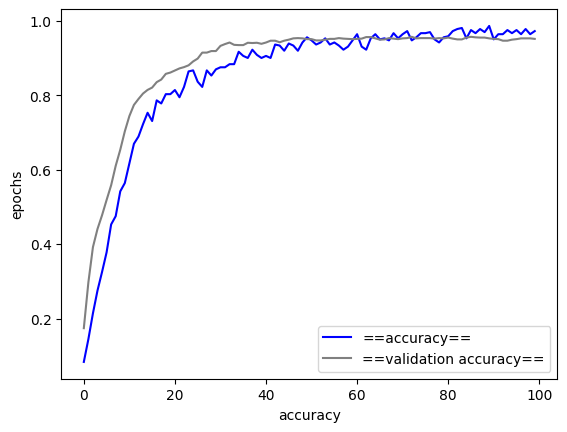

In [ ]:
plt.plot(History.history['accuracy'],color='blue',label='==accuracy==')
plt.plot(History.history['val_accuracy'],color='gray',label='==validation accuracy==')
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.legend()
plt.show()